# INSAID ASSIGNMENT

### Task: This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan.

### 1. Importing the necessary libraries and exploring the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### 2. Data cleaning 

a) Checking for missing values and handling them.

In [7]:
# Checking for the missing values:
df.isnull().sum()
# It is observed that there are no missing values in  our data.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

b) Checking for outliers and handling them.

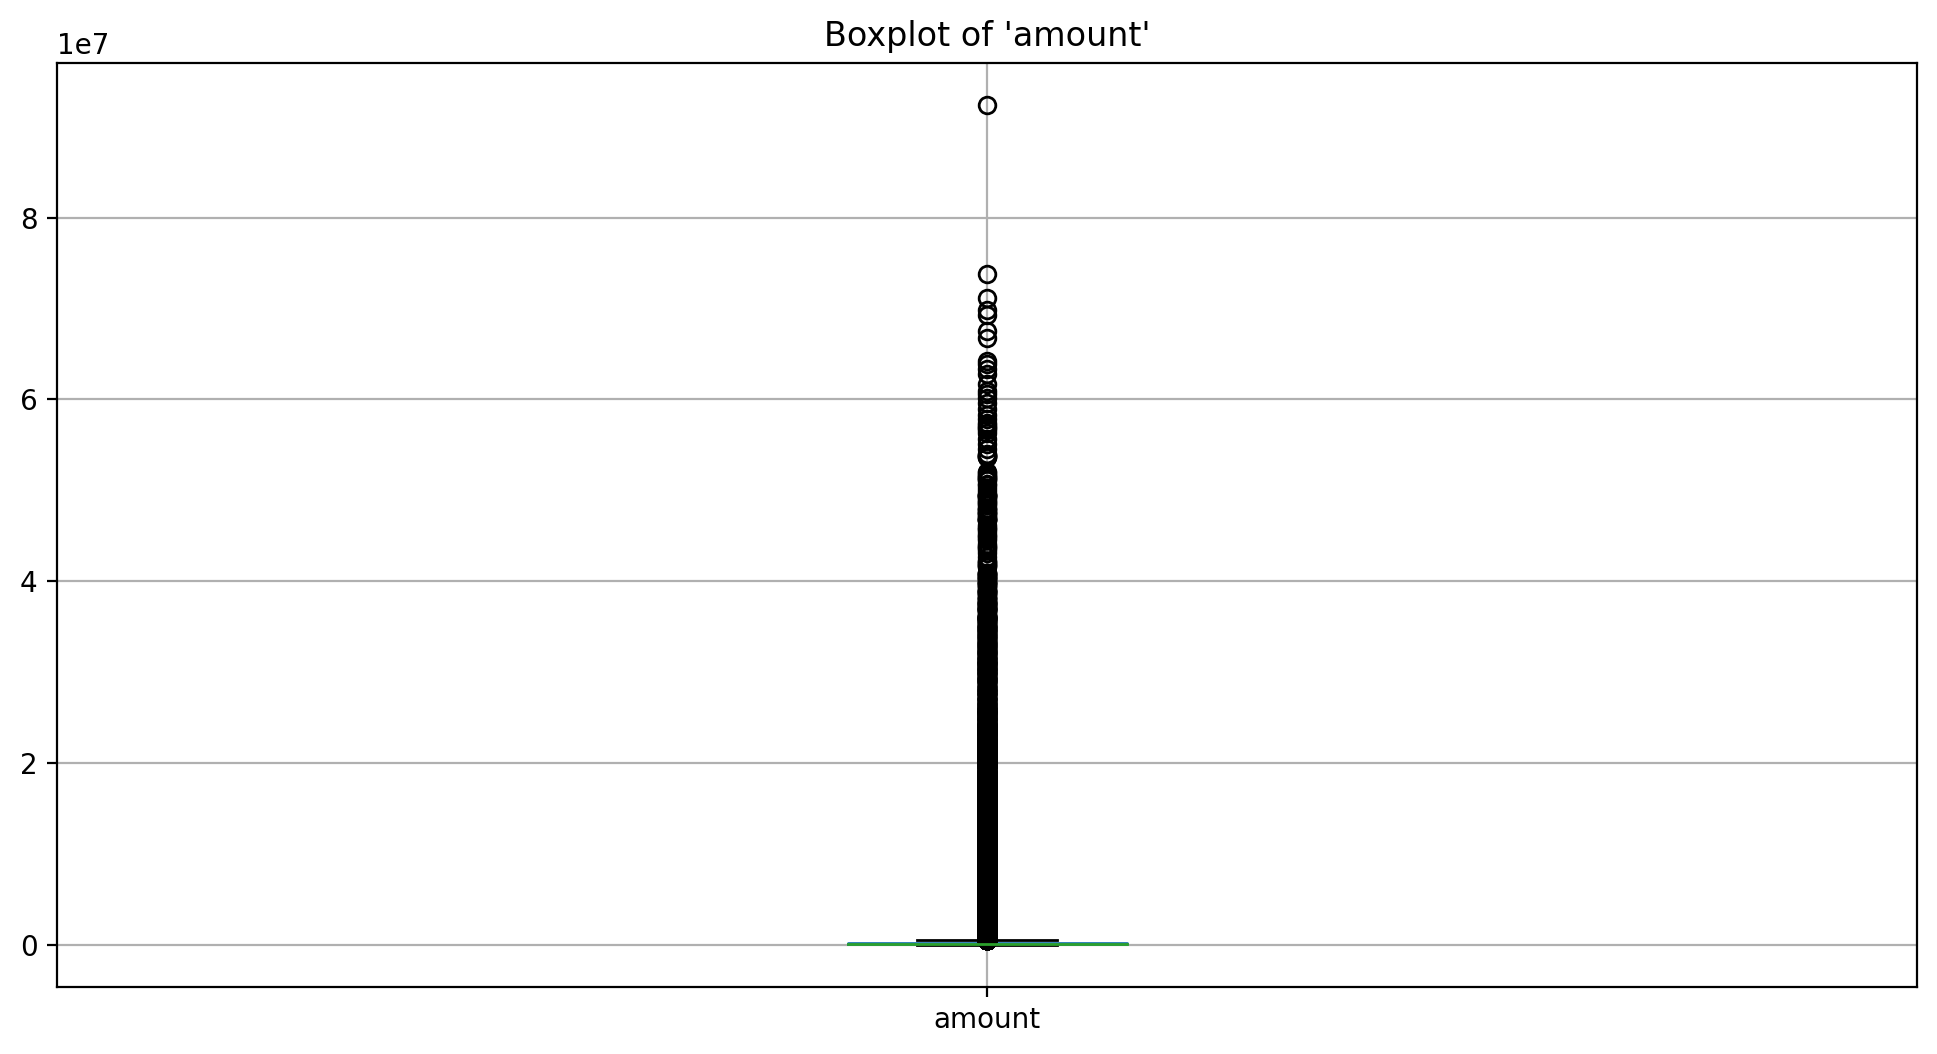

In [8]:
# Checking for outliers using the BoxPlot:
plt.figure(figsize=(12, 6), dpi=200)
df.boxplot(column='amount')
plt.title("Boxplot of 'amount'")
plt.show()

In [9]:
# Handling outliers using the interquartile range (IQR) method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print("Number of outliers: ", len(outliers))

# Remove outliers from the data
df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]
print("Data after handling outliers:", df.shape)

Number of outliers:  338078
Data after handling outliers: (6024542, 11)


c) Checking for multi-collinearity and handling it.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_348\3277084746.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


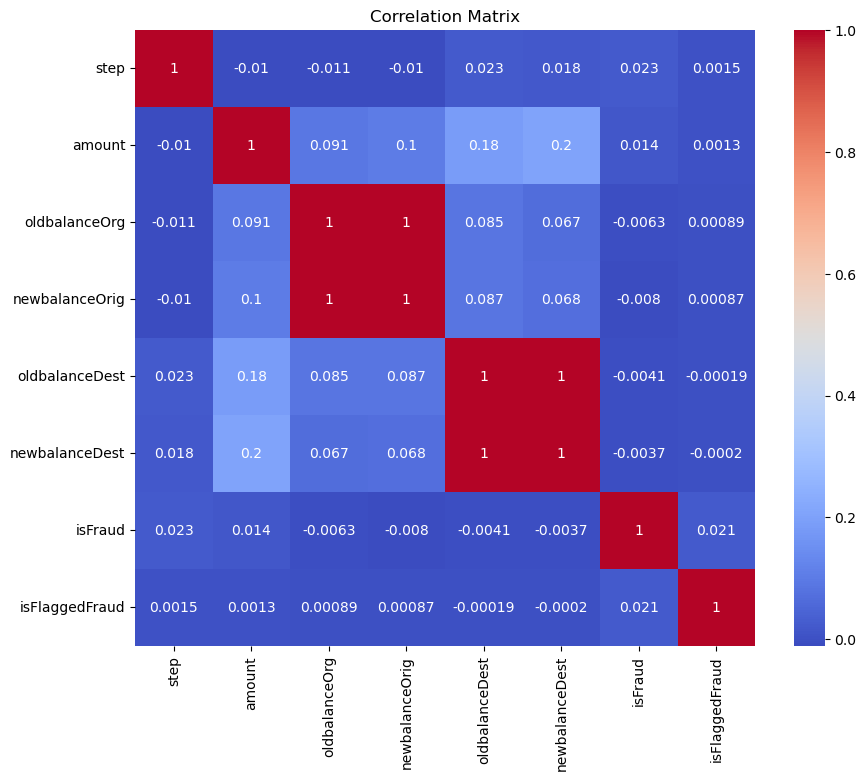

In [10]:
# For this, I'll be using Correlation Analysis technique
correlation_matrix = df.corr()
# Visualizing correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# From the heatmap we an infer that the variables "oldbalanceDest" and "newbalanceDest" are highly correlated.

In [11]:
# Handling multi-collinearity by dropping one of the columns:
# As it was observed that 'oldbalanceDest' and 'newbalanceDest' are highly correlated, drop the 'oldbalanceDest' column.
df = df.drop('oldbalanceDest', axis=1)

In [12]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,339850.17,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,1,0


Now, the data is cleaned and ready for the further process.

### 3. Variable/Feature Selection

In [14]:
# Feature selection using correlation matrix:
corr_matrix = df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_348\1767393861.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


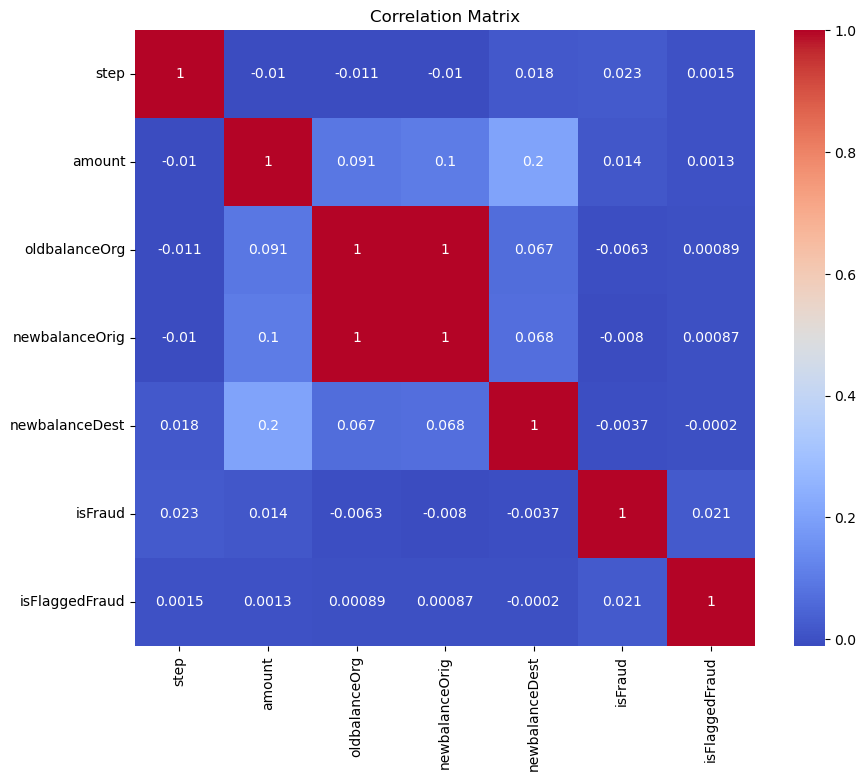

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
high_corr_features = corr_matrix['isFraud'].abs().sort_values(ascending=False).index[:6]

In [19]:
df = df[high_corr_features]

In [20]:
df

,isFraud,step,isFlaggedFraud,amount,newbalanceOrig,oldbalanceOrg
0,0,1,0,9839.64,160296.36,170136.00
1,0,1,0,1864.28,19384.72,21249.00
2,1,1,0,181.00,0.00,181.00
3,1,1,0,181.00,0.00,181.00
4,0,1,0,11668.14,29885.86,41554.00
...,...,...,...,...,...,...
6362609,1,742,0,258355.42,0.00,258355.42
6362610,1,742,0,63416.99,0.00,63416.99
6362611,1,742,0,63416.99,0.00,63416.99
6362614,1,743,0,339682.13,0.00,339682.13


I have selected the featured based on the correlation matrix, now the data is ready for training the model.

I will be using RandomForestClassifier.

### 4. Model building and testing

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
preds = model.predict(X_test)

### 5. Model Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1204008
           1       0.94      0.91      0.92       901

    accuracy                           1.00   1204909
   macro avg       0.97      0.95      0.96   1204909
weighted avg       1.00      1.00      1.00   1204909



In [29]:
print(confusion_matrix(y_test, preds))

[[1203957      51]
 [     85     816]]


# Elaboration of the model:

--> The fraud detection model implemented in this case is a Random Forest classifier. </br>
--> Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. </br>
--> Each decision tree in the Random Forest is trained on a random subset of features and provides an individual prediction. </br>
--> The final prediction of the Random Forest is determined by a majority vote or averaging of the predictions from the individual trees. </br>
--> Firstly, I cleaned the data by handling the missing values, outliers and multicollinearity. </br>
--> Then, I performed feature selection using correlation matrix on the dataset to select the best features for the model training purpose. </br>
--> Afterwards, I used RandomForestClassifier model. </br>
--> 80% of the dataset was used for training purpose and the remaining 20% of the dataset was used for testing purpose. </br>
--> Finally, the model was evaluated using the evaluation metrics inlcuding the classification resport and confusion matrix. </br>
--> It can be inferred from the classification report that the precision, recall, f1-score and accuracy of the model was quite good. </br>

# Key factors that predict fraudulent customer

By implementing feature selection on the dataset, it was observed that the following are the key factors that predict a fraudulent customer:  </br> 
1. "step"
2. "isFlaggedFraud"
3. "amount"
4. "newbalanceOrig"
5. "oldbalanceOrg"

with respect to the labelled column, "isFraud".

# Do these factors make sense? If yes, How? If not, How not?

Yes, these factors do make sense as: </br>
1. step - maps a unit of time in the real world </br>
--> Time-related factors can be crucial in detecting patterns or anomalies that indicate fraudulent activity </br>
2. isFlaggedFraud: The business model aims to control massive transfers from one account to another and flags illegal attempts.  An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction </br>
--> This binary flag indicates whether a transaction has been flagged as a potential fraud. This factor provides direct information to the fraud detection system, making it highly relevant in fraud prediction. </br>
3. amount - amount of the transaction in local currency </br>
--> The transaction amount can be an important factor as fraudulent transactions often involve unusual or higher-than-normal amounts. Unusually large or small transaction amounts may raise suspicion and indicate potential fraud. </br>
4. oldbalanceOrg and newbalanceOrig: initial/new balance before/after the transaction </br>
--> Sudden and unexpected changes in account balances can be indicative of fraudulent activity, such as money laundering or unauthorized account access. </br>

These factors make sense in fraud prediction based on their potential to capture important characteristics or patterns associated with fraudulent transactions. </br>

# Prevention measures to be taken during company's infrastructure updates

While updating the infrastructure, the company should consider implementing the following prevention measures: </br>
--> Enhance authentication and authorization mechanisms </br>
--> Implement real-time monitoring of transactions and anomaly detection </br>
--> Use machine learning models for fraud detection and prevention </br>
--> Implement secure coding practices to prevent vulnerabilities </br>
--> Educate employees and customers about fraud risks and prevention measures </br>

# Determination of the effectiveness of the prevention measures

The effectiveness of the prevention measures can be determined by: </br>
--> Monitoring and tracking fraud incidents over time to see if there is a reduction in fraudulent activities </br>
--> Analyzing the false positive and false negative rates of the fraud detection model to ensure its performance </br>
--> Collecting feedback from employees, customers, or relevant stakeholders regarding the effectiveness of the prevention measures </br>